In [3]:
import mapd_renderer
import ibis
import altair as alt

In [5]:
host = dict(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https')

In [8]:
mapd = ibis.mapd.connect(**host)
table = mapd.table('tweets_nov_feb')
expr = table[table.goog_x, table.goog_y, table.tweet_id]
expr = expr.filter([
    expr.goog_x < 7413325.514451755,
    expr.goog_x > -3650484.1235206556, 
    expr.goog_y < 10471808.487466192,
    expr.goog_y > -5778161.9183506705, 
])

In [14]:
pandas = ibis.pandas.connect({table.name: expr.limit(100).execute()})

# Plotting a subset of the MapD data.

In [15]:
def expression(t):
    expr = t[t.goog_x.name('x'), t.goog_y.name('y'), t.tweet_id.name('rowid')]
    expr = expr.filter([
        expr.x < 7413325.514451755,
        expr.x > -3650484.1235206556, 
        expr.y < 10471808.487466192,
        expr.y > -5778161.9183506705, 
    ])
    return expr

In [16]:
pandas_expr = expression(pandas.table(table.name))

In [22]:
alt.renderers.enable('default')

chart = lambda object: alt.Chart(object).mark_square(
    color='green',
    size=20,
    clip=True
).encode(
    alt.X(
        'x:Q',
        scale=alt.Scale(domain=[-3650484.1235206556, 7413325.514451755], range='width')
    ),
    alt.Y(
        'y:Q',
        scale=alt.Scale(domain=[-5778161.9183506705, 10471808.487466192], range='height')
    ),)

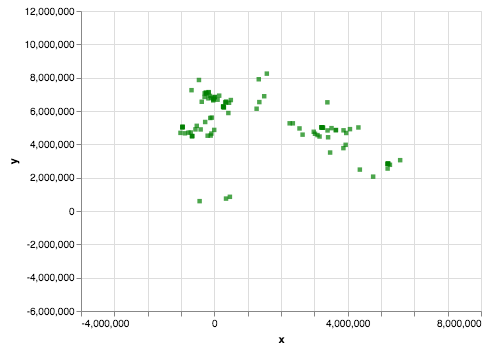

In [23]:
chart(pandas_expr.execute())

In [24]:
mapd_expr = expression(mapd.table(table.name))

# Plotting All the MapD data

## Basic Altair Renderer

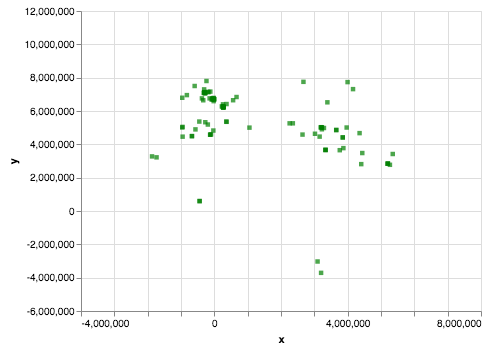

In [25]:
alt.renderers.enable('default')
chart(mapd_expr.limit(100).execute())

## MapD Altair renderer

In [27]:
alt.renderers.enable('mapd', conn=mapd_cli)
chart(mapd_expr.compile())